<img src="https://www.usna.edu/WRC/_files/WRClogos/WRCE-logo-combined-01-crop.png" width="200px">

# Lab 2

### Dimming LEDs

In [ ]:
import analogio
import pwmio
import time
from board import *

# set knob and led pins
knob = analogio.AnalogIn(A0)
light = pwmio.PWMOut(GP15)

# set led to knob value
while True: 
    light.duty_cycle = knob.value

### Gamma Correction

In [ ]:
import analogio
import pwmio
import time
from board import *

# set knob and led pins
knob = analogio.AnalogIn(A0)
light = pwmio.PWMOut(GP15)

MAX = 2**16 - 1
GAMMA = 3.0

# set led to gamma corrected knob value
while True: 
    value = knob.value
    gamma = ((value / MAX) ** GAMMA) * MAX
    print(gamma)
    light.duty_cycle = int(gamma)
    time.sleep(0.05)

Gamma Correction Plot

Text(0.5, 1.0, 'Gamma Correction')

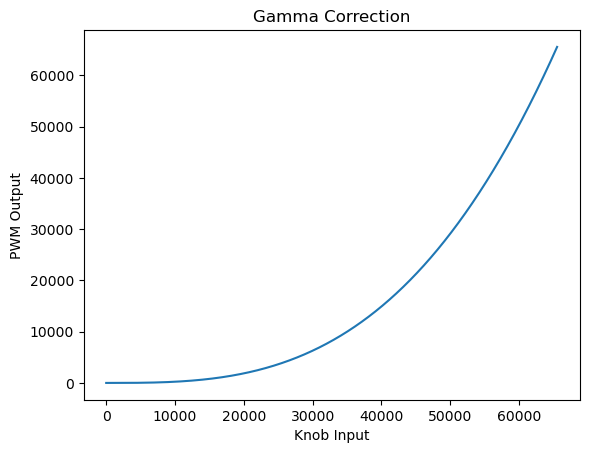

In [3]:
import matplotlib.pyplot as plt

GAMMA = 3.0
MAX = 2**16 - 1

values = list(range(0, MAX, 10))

# apply gamma correction to a new list
corrected_values = []
for v in values:
    new_value = ((v / MAX) ** GAMMA) * MAX
    corrected_values.append(new_value)

# graph gamma corrected values
plt.plot(values, corrected_values)
plt.xlabel("Knob Input")
plt.ylabel("PWM Output")
plt.title("Gamma Correction")

### Heart Beat

In [ ]:
import analogio
import pwmio
import time
from math import sin, pi
from board import *

# assign led pin
light = pwmio.PWMOut(GP15)

# create list for sin wave brightness values
brightness = []
values = list(range(1, 101))
for x in values: 
    brightness.append(int((2**15)*sin(((2*pi)/100)*x) + 2**15))

# cycle through brightness list and set led brightness
while True: 
    for x in brightness:
        # duty_cycle only accepts integers from 0 to 65536
        if x < 2**16:
            light.duty_cycle = int(x)
            time.sleep(0.01)

### Bonus

In [ ]:
import analogio
import pwmio
import time
from math import sin, pi
from board import *

# set knob and led pin
knob = analogio.AnalogIn(A0)
light = pwmio.PWMOut(GP15)

# create list for sin wave brightness values
brightness = []
values = list(range(1, 101))
for x in values: 
    brightness.append(int((2**15)*sin(((2*pi)/100)*x) + 2**15))

MAX = 2**16 - 1
GAMMA = 3.0

# cycle through brightness list and set led brightness
while True: 
    for x in brightness:
        # duty_cycle only accepts integers from 0 to 65536
        if x < 2**16:
            # get knob value and gamma correct it
            value = knob.value
            percent = ((value / MAX) ** GAMMA)
            light.duty_cycle = int(x)
            # use time.sleep to change frequency of heartbeat
            time.sleep(0.1 * percent)
